<a href="https://colab.research.google.com/github/boiBASH/Tolaram_Project/blob/main/tolaram_visialization_unmasked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import pandas
import pandas as pd

# Step 3: Load your dataset (replace with the actual path in your Drive)
file_path = "/content/drive/MyDrive/TOLARAM/Data sample analysis.csv"
df = pd.read_csv(file_path, encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-7cdf484f43a5>:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


In [2]:
df

,Brand,Branch,Designation,SKU_Code,Salesman_Code,Salesman_Name,Customer_Name,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
0,ADDMIE,LAGOS 1,FIELD EXECUTIVE,10002778,807259,ANOSIKE MIRACLE CHIMECHEFULAM,Eze store,8060733751,11432770,5/8/2024 0:00,3.0,"46,500"
1,ADDMIE,LAGOS 1,FIELD EXECUTIVE,10002778,807881,OKERE IFEANYI,Chimaka,9016204667,11565436,26/08/2024 00:00,1.0,"15,500"
2,ADDMIE,LAGOS 1,FIELD EXECUTIVE,10002778,807881,OKERE IFEANYI,Chimaka,9016204667,11727113,17/09/2024 00:00,1.0,"15,500"
3,ADDMIE,LAGOS 1,FIELD EXECUTIVE,10002778,807881,OKERE IFEANYI,Cynthia chi,8060359775,11756045,20/09/2024 00:00,1.0,"15,500"
4,ADDMIE,LAGOS 1,FIELD EXECUTIVE,10002778,807881,OKERE IFEANYI,Daddy Josephine,9075013565,11585122,29/08/2024 00:00,1.0,"15,500"
...,...,...,...,...,...,...,...,...,...,...,...,...
108820,POWER OIL,LAGOS 1,VAN SALES EXECUTIVE,VOB4500_,810667,ONYIA CHUKA,House 1 super store,8101599308,12090661,1/11/2024 0:00,1.0,"56,800"
108821,POWER OIL,LAGOS 1,VAN SALES EXECUTIVE,VOB4500_,810667,ONYIA CHUKA,Loveth ejiro,8139407516,12282897,22/11/2024 00:00,1.0,"33,000"
108822,POWER OIL,LAGOS 1,VAN SALES EXECUTIVE,VOB4500_,810667,ONYIA CHUKA,Mrs Jennifer,8060468927,12067581,30/10/2024 00:00,4.0,"201,600"
108823,POWER OIL,LAGOS 1,VAN SALES EXECUTIVE,VOB4500_,810667,ONYIA CHUKA,TWINNY SQUARE ENTERPRISES,8055148535,12032444,25/10/2024 00:00,1.0,"50,400"


In [3]:
# Convert Delivered_date to datetime
df['Delivered_date'] = pd.to_datetime(df['Delivered_date'], errors='coerce', dayfirst=True)

print(df['Delivered_date'].isna().sum())

# Convert 'Delivered_date' to datetime objects with the correct format
#data_df['Delivered_date'] = pd.to_datetime(data_df['Delivered_date'], format="%d/%m/%Y %H:%M")

# Find the minimum and maximum dates
start_date = df['Delivered_date'].min()
end_date = df['Delivered_date'].max()

data_df = df.sort_values(by='Delivered_date')
# Calculate the total time range
total_days = (end_date - start_date).days

# Print the date range
print(f"Dataset Date Range: {start_date} to {end_date}")
print(f"Total Days: {total_days}")

0
Dataset Date Range: 2024-08-01 00:00:00 to 2025-01-31 00:00:00
Total Days: 183


In [4]:
# Clean and convert Redistribution Value (remove commas and convert to float)
# Convert 'Redistribution Value' to string first, if it's not already
df['Redistribution Value'] = df['Redistribution Value'].astype(str).str.replace(',', '', regex=False).astype(float)


# Step 3: Fill missing 'Delivered Qty' with 0 (or could be dropped if preferred)
df['Delivered Qty'] = df['Delivered Qty'].fillna(0)


# Confirm changes
# Quick check for nulls or conversion issues
df[['Redistribution Value', 'Delivered_date']].info()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108825 entries, 0 to 108824
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Redistribution Value  108825 non-null  float64       
 1   Delivered_date        108825 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 MB


,0
Brand,object
Branch,object
Designation,object
SKU_Code,object
Salesman_Code,object
Salesman_Name,object
Customer_Name,object
Customer_Phone,int64
Order_Id,int64
Delivered_date,datetime64[ns]


<ipython-input-5-a09ea2c428fe>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-5-a09ea2c428fe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


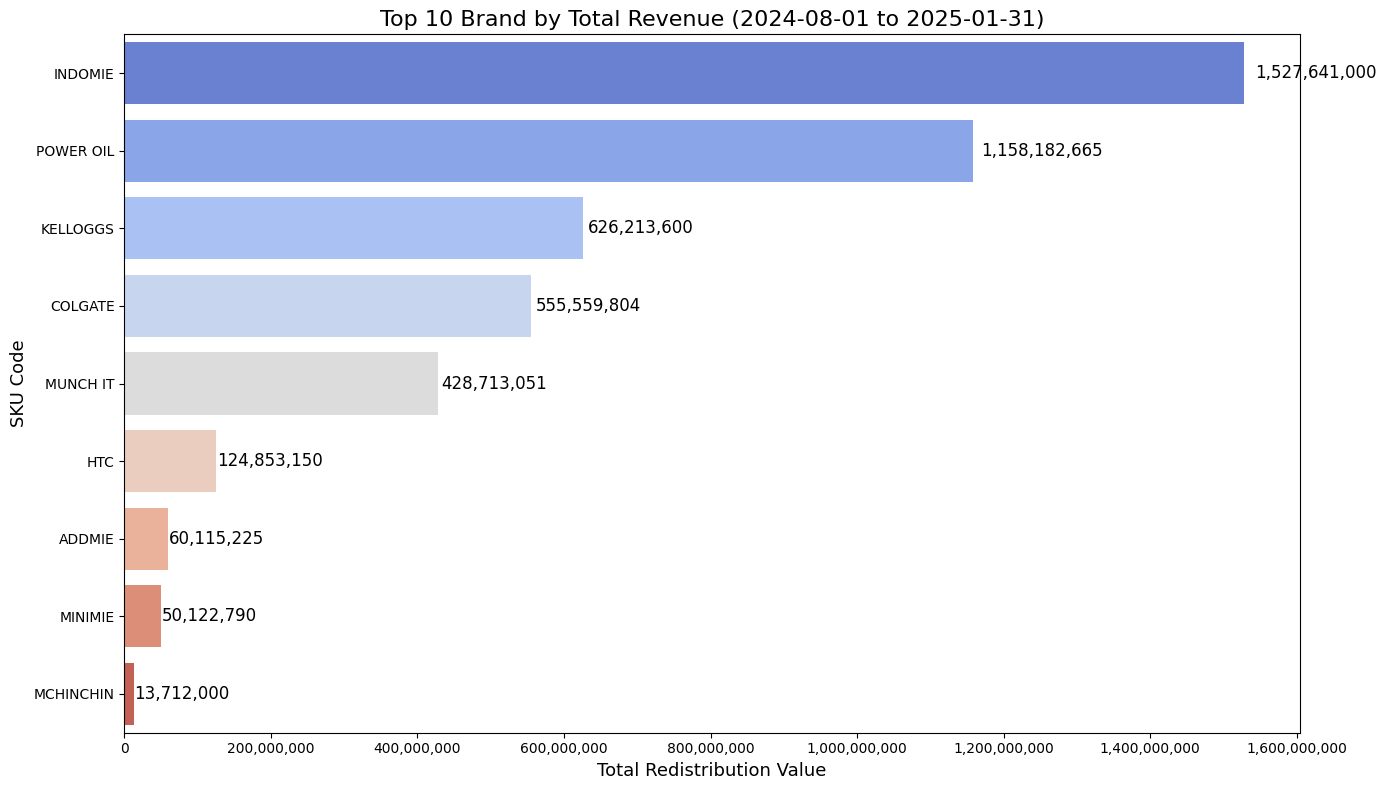

In [5]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

top_skus_value = (df.groupby("Brand")["Redistribution Value"].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(14, 8))  # Increased size for better readability
ax = sns.barplot(
    x=top_skus_value.values,
    y=top_skus_value.index,
    palette="coolwarm",
    ci=None
)

plt.title("Top 10 Brand by Total Revenue (2024-08-01 to 2025-01-31)", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("SKU Code", fontsize=13)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Format x-axis to show full numbers

# Optional: Add value labels on each bar
for i, v in enumerate(top_skus_value.values):
    ax.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-6-120f3fe966a9>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-6-120f3fe966a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


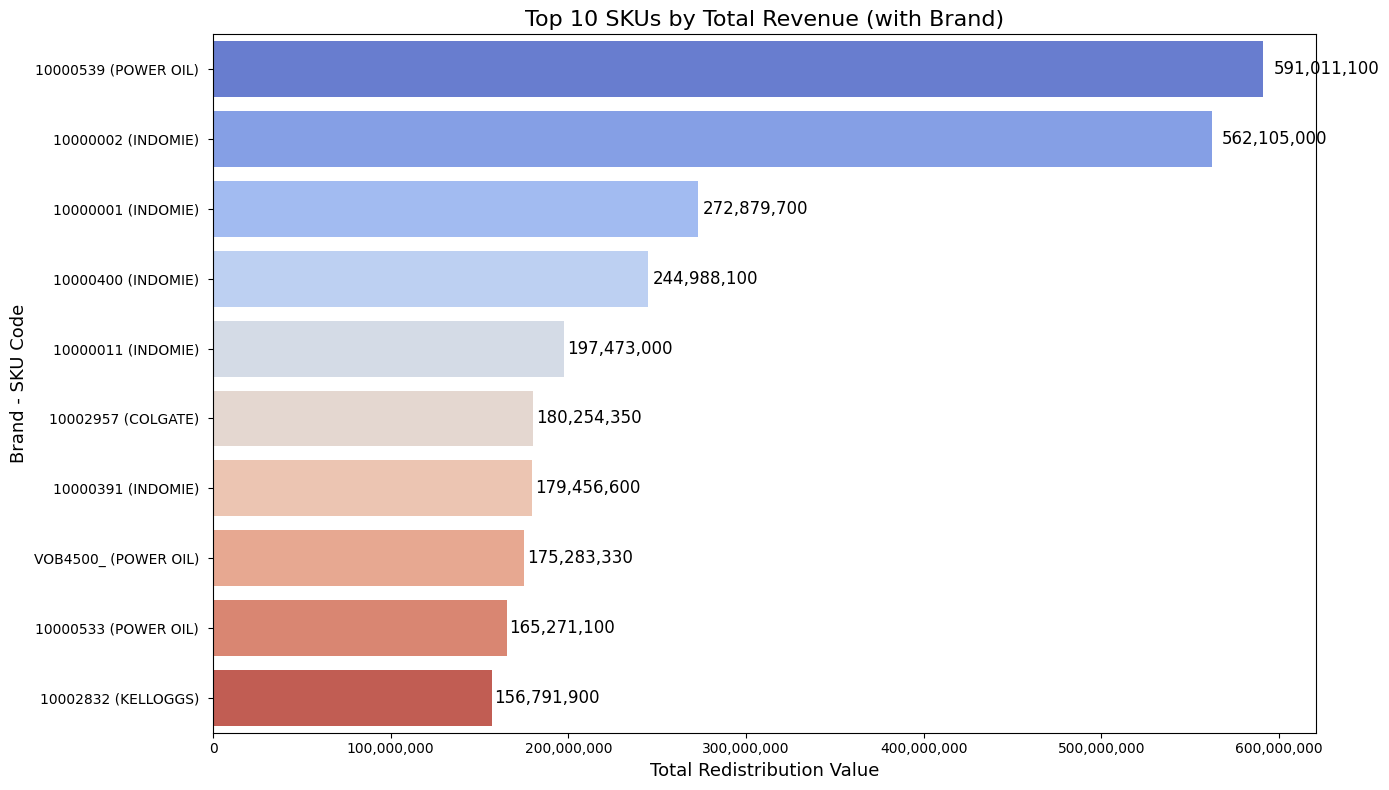

In [6]:
# DataFrame  has columns 'Brand', 'SKU_Code', and 'Redistribution Value'
# Create a new column combining Brand and SKU Code
df['Brand_SKU'] = df['SKU_Code'] + ' (' + df['Brand'] + ') '

# Group by the combined 'Brand_SKU' column and sum the 'Redistribution Value'
top_brand_skus_value = (
    df.groupby("Brand_SKU")["Redistribution Value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=top_brand_skus_value.values,
    y=top_brand_skus_value.index,
    palette="coolwarm",
    ci=None
)

plt.title("Top 10 SKUs by Total Revenue (with Brand)", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("Brand - SKU Code", fontsize=13)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for i, v in enumerate(top_brand_skus_value.values):
    ax.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-7-4d4e6e27491c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
<ipython-input-7-4d4e6e27491c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


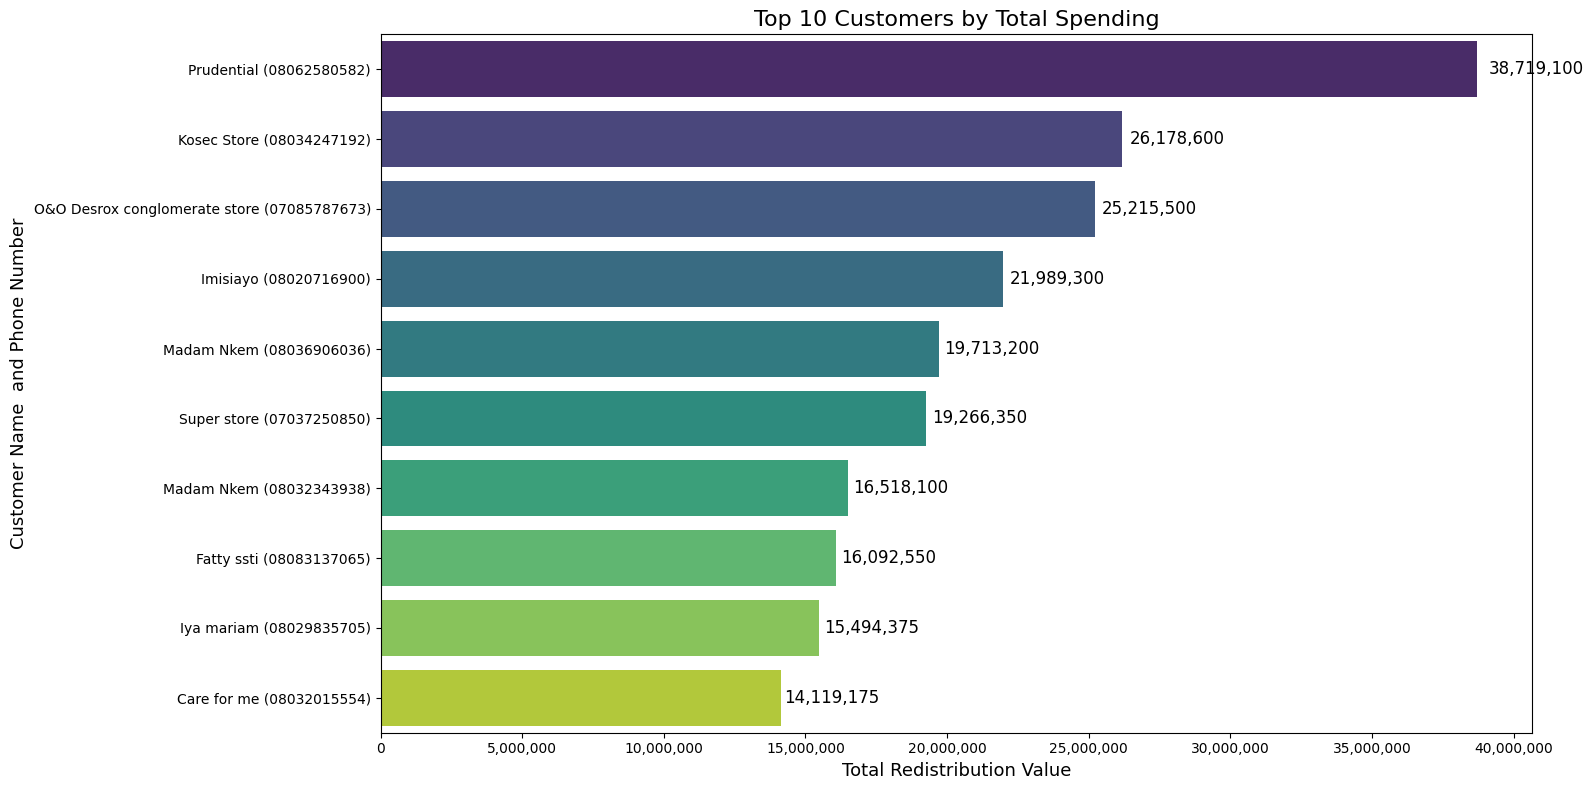

In [7]:
# Dataframe has columns 'Customer_Name', 'Customer_Phone', and 'Redistribution Value'

# Create a new column combining Customer Name and Phone
df['Customer_Info'] = df['Customer_Name'] + ' (0' + df['Customer_Phone'].astype(str) + ')'

# Group by the combined 'Customer_Info' column and sum the 'Redistribution Value'
customer_ltv_with_name = (
    df.groupby("Customer_Info")["Redistribution Value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(16, 8))
ax2 = sns.barplot(
    x=customer_ltv_with_name.values,
    y=customer_ltv_with_name.index,
    palette="viridis",
    ci=None
)
plt.title("Top 10 Customers by Total Spending", fontsize=16)
plt.xlabel("Total Redistribution Value", fontsize=13)
plt.ylabel("Customer Name  and Phone Number", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(customer_ltv_with_name.values):
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-8-1ca4a3af8d39>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
<ipython-input-8-1ca4a3af8d39>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


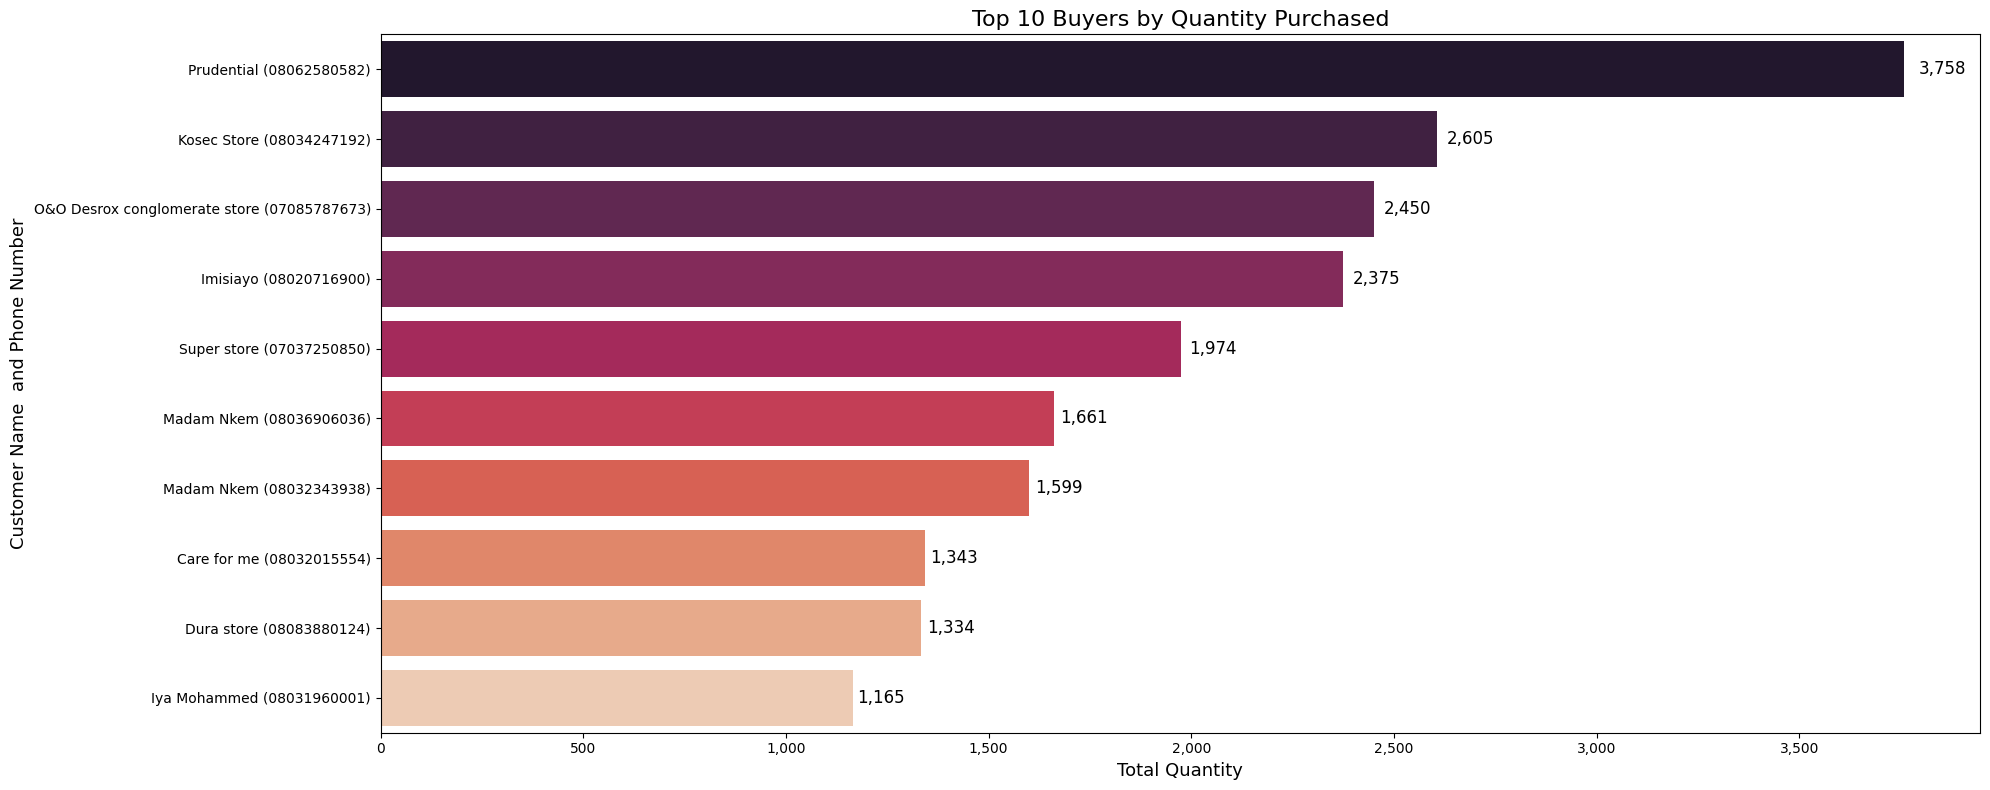

In [8]:
# Dataframe has columns 'Customer_Name', 'Customer_Phone', and 'Redistribution Value'

# Create a new column combining Customer Name and Phone
df['Customer_Info'] = df['Customer_Name'] + ' (0' + df['Customer_Phone'].astype(str) + ')'

# Group by the combined 'Customer_Info' column and sum the Delivered Qty'
top_buyers_qty_with_name = (
    df.groupby("Customer_Info")["Delivered Qty"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Increase the figure width significantly to accommodate potentially long labels
plt.figure(figsize=(20, 8)) # Increased width from 14 to 20
ax2 = sns.barplot(
    x=top_buyers_qty_with_name.values,
    y=top_buyers_qty_with_name.index,
    palette="rocket",
    ci=None
)
plt.title("Top 10 Buyers by Quantity Purchased", fontsize=16)
plt.xlabel("Total Quantity", fontsize=13)
plt.ylabel("Customer Name  and Phone Number", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels on each bar
for i, v in enumerate(top_buyers_qty_with_name.values):
    # Adjust the text placement slightly if needed
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-9-0c0d8673d6b4>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
<ipython-input-9-0c0d8673d6b4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


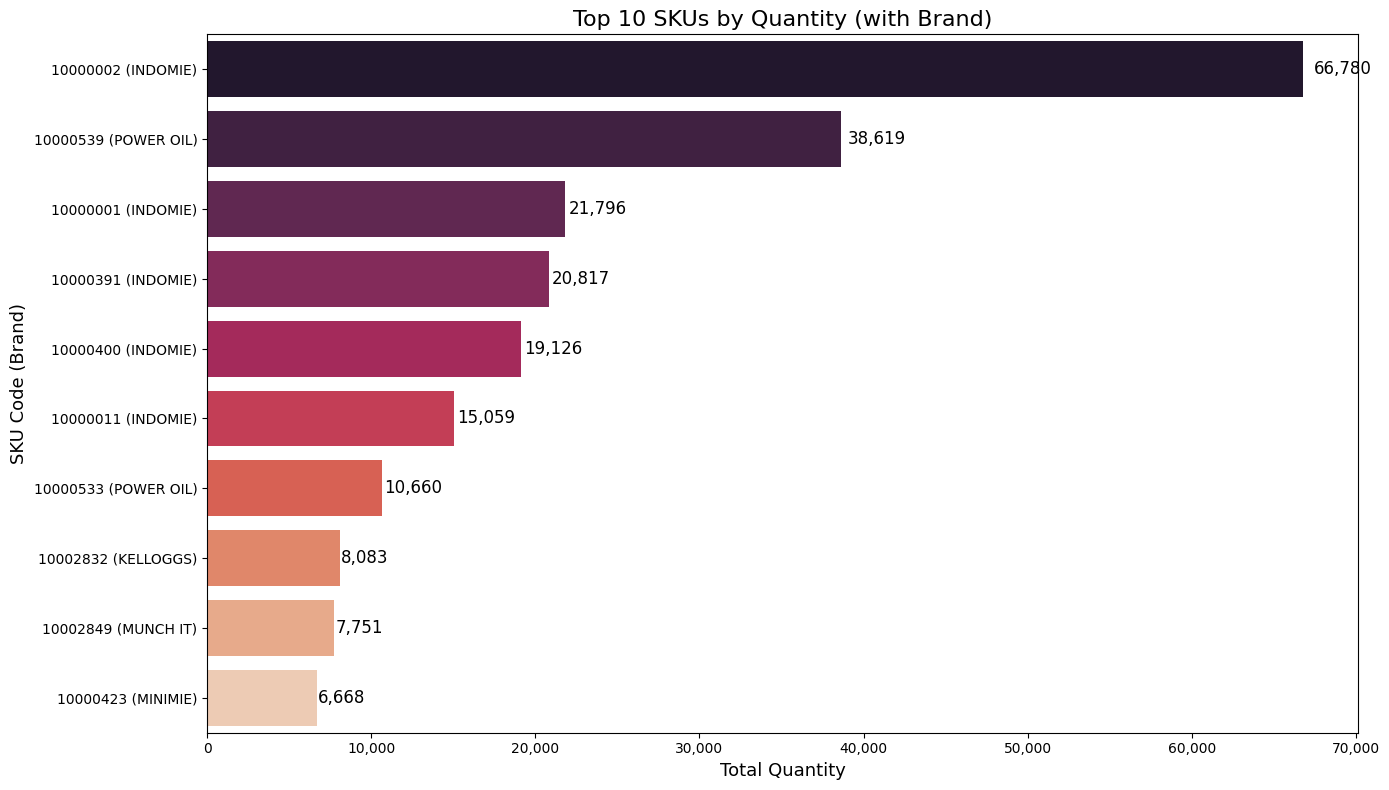

In [9]:
# Assuming your DataFrame is named 'df' and has columns 'Brand', 'SKU_Code', and 'Delivered Qty'

# Create a new column combining SKU Code and Brand
df['SKU_Brand'] = df['SKU_Code'] + ' (' + df['Brand'] + ')'

# Group by the combined 'SKU_Brand' column and sum the 'Delivered Qty'
top_skus_qty_with_brand = (
    df.groupby("SKU_Brand")["Delivered Qty"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(
    x=top_skus_qty_with_brand.values,
    y=top_skus_qty_with_brand.index,
    palette="rocket",
    ci=None
)
plt.title("Top 10 SKUs by Quantity (with Brand)", fontsize=16)
plt.xlabel("Total Quantity", fontsize=13)
plt.ylabel("SKU Code (Brand)", fontsize=13)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, v in enumerate(top_skus_qty_with_brand.values):
    ax2.text(v + (v * 0.01), i, f'{int(v):,}', color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-10-24f20cd4f3d8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=repeat_vs_one_time, x="Type", y="Customer Count", palette="pastel", ci=None)
<ipython-input-10-24f20cd4f3d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=repeat_vs_one_time, x="Type", y="Customer Count", palette="pastel", ci=None)


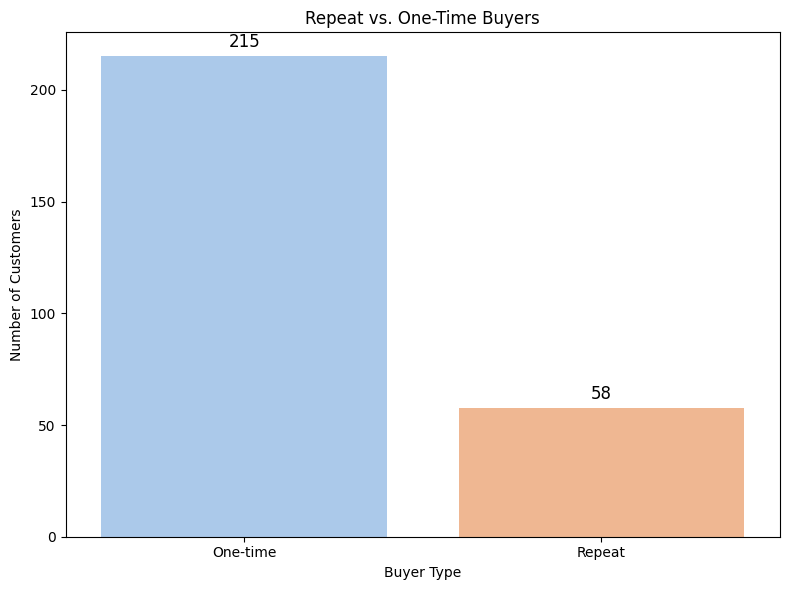

In [10]:
buyer_order_counts = df.groupby("Customer_Phone")["Delivered_date"].nunique()
repeat_vs_one_time = buyer_order_counts.value_counts().reset_index()
repeat_vs_one_time.columns = ['Purchase Count', 'Customer Count']
repeat_vs_one_time['Type'] = repeat_vs_one_time['Purchase Count'].apply(lambda x: 'One-time' if x == 1 else 'Repeat')

# Corrected plot without the error bar
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=repeat_vs_one_time, x="Type", y="Customer Count", palette="pastel", ci=None)
plt.title("Repeat vs. One-Time Buyers")
plt.xlabel("Buyer Type")
plt.ylabel("Number of Customers")

# Add count labels
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 10),
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

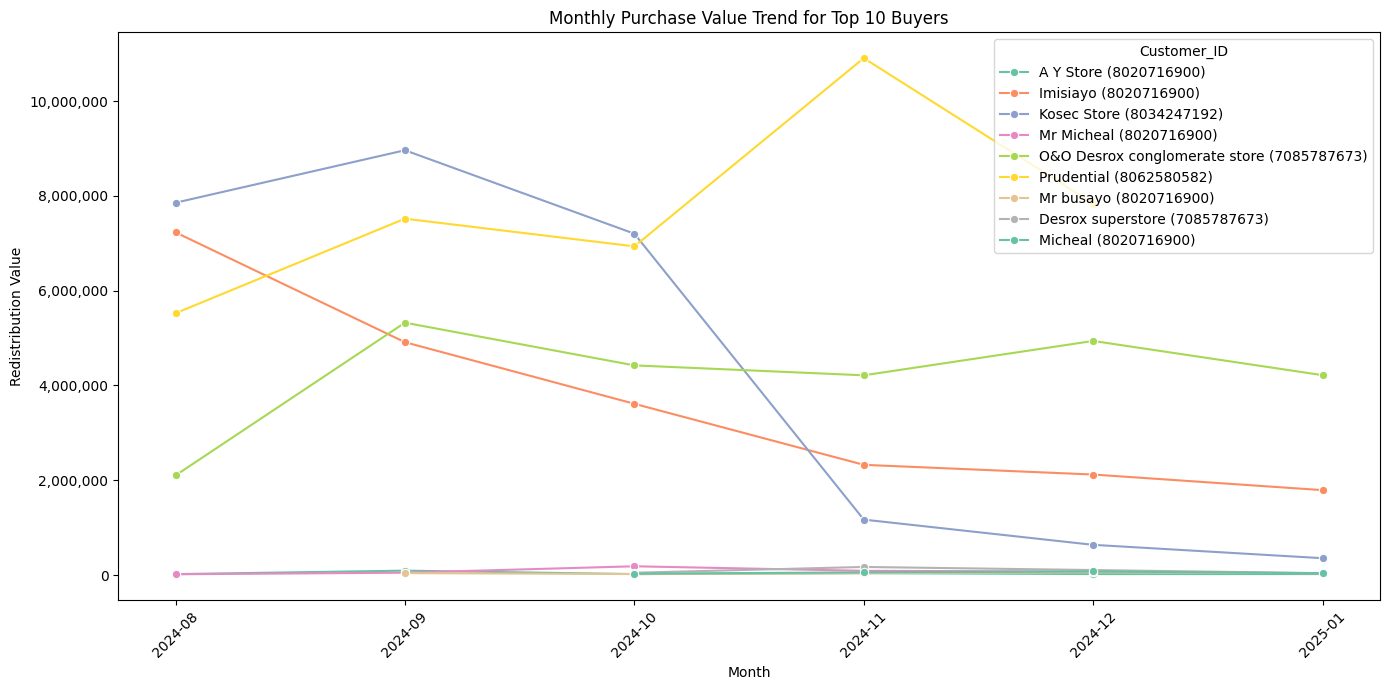

In [11]:
# Get top 10 buyers by total redistribution value
top10_buyers = df.groupby("Customer_Phone")["Redistribution Value"].sum().sort_values(ascending=False).head(4).index  # Changed to top 10

# Add 'Month' column to the original df *before* filtering
# This ensures the 'Month' column exists when df_top_buyers is created
df['Month'] = df['Delivered_date'].dt.to_period('M').astype(str)

# Filter dataset
df_top_buyers = df[df["Customer_Phone"].isin(top10_buyers)].copy()  # Create a copy to avoid modifying original df


# Create a combined Customer_ID for the legend
df_top_buyers['Customer_ID'] = df_top_buyers['Customer_Name'] + ' (' + df_top_buyers['Customer_Phone'].astype(str) + ')'

# Group by Buyer and Month
buyer_monthly = df_top_buyers.groupby(['Month', 'Customer_ID'])['Redistribution Value'].sum().reset_index()

plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=buyer_monthly, x="Month", y="Redistribution Value", hue="Customer_ID", marker="o", palette="Set2")
plt.title("Monthly Purchase Value Trend for Top 10 Buyers")  # Changed title to Top 10
plt.xlabel("Month")
plt.ylabel("Redistribution Value")
plt.xticks(rotation=45)

# Format y-axis to display whole numbers, not scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


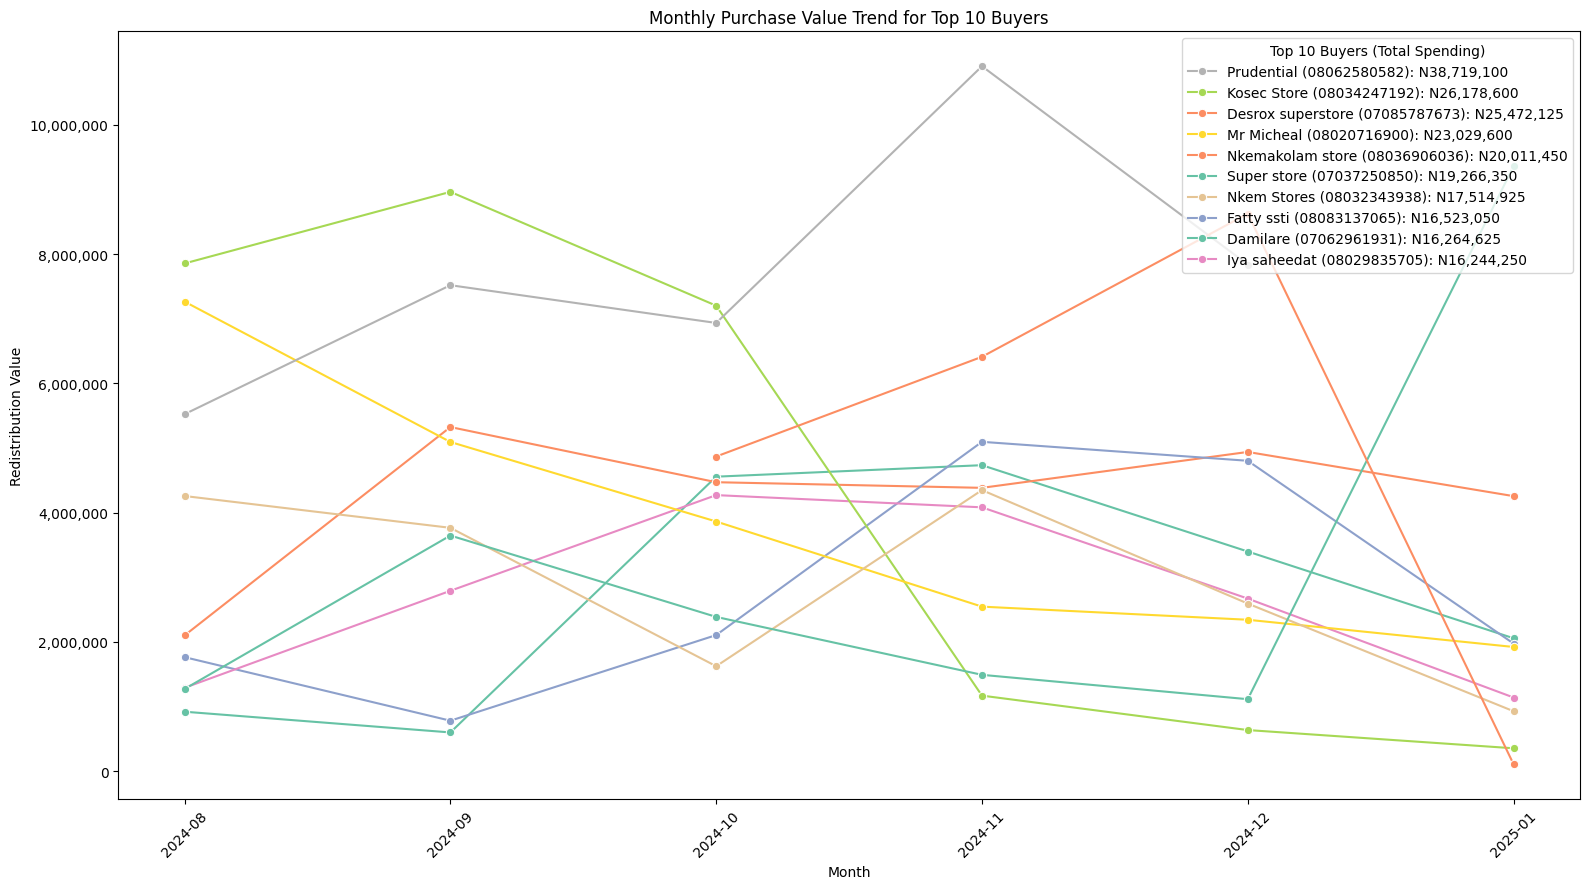

In [12]:
# Get top buyers by total redistribution value
customer_spending = df.groupby("Customer_Phone")["Redistribution Value"].sum().sort_values(ascending=False).head(10)

# Get the phone numbers of the top 10 customers (already sorted)
top10_buyers = customer_spending.index

# Create a dictionary to store customer info with total spending (sorted by value)
customer_info = {}
for phone, value in customer_spending.items():
    customer_name = df[df["Customer_Phone"] == phone]["Customer_Name"].iloc[0]
    customer_info[phone] = f"{customer_name} (0{phone}): N{int(value):,}"

# Add 'Month' column to the original df *before* filtering
df['Month'] = df['Delivered_date'].dt.to_period('M').astype(str)

# Filter dataset for the top 10
df_top_buyers = df[df["Customer_Phone"].isin(top10_buyers)].copy()

# Create the Customer_ID for the legend using the dictionary
df_top_buyers['Customer_ID'] = df_top_buyers['Customer_Phone'].map(customer_info)

# Group by Buyer and Month
buyer_monthly = df_top_buyers.groupby(['Month', 'Customer_ID'])['Redistribution Value'].sum().reset_index()

plt.figure(figsize=(16, 9))  # Increased figure size for better legend readability
ax = sns.lineplot(data=buyer_monthly, x="Month", y="Redistribution Value", hue="Customer_ID", marker="o", palette="Set2")
plt.title("Monthly Purchase Value Trend for Top 10 Buyers")
plt.xlabel("Month")
plt.ylabel("Redistribution Value")
plt.xticks(rotation=45)

# Format y-axis to display whole numbers, not scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Sort the legend handles and labels based on the order in customer_spending
handles, labels = ax.get_legend_handles_labels()
sorted_labels = [customer_info[phone] for phone in top10_buyers]
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]
ax.legend(sorted_handles, sorted_labels, title='Top 10 Buyers (Total Spending)', loc='upper right')

plt.tight_layout()
plt.show()

# Shorten the long store name
#df_top_buyers['Customer_Name'] = df_top_buyers['Customer_Name'].replace("O&O Desrox conglomerate store", "O&O Desrox cong store")


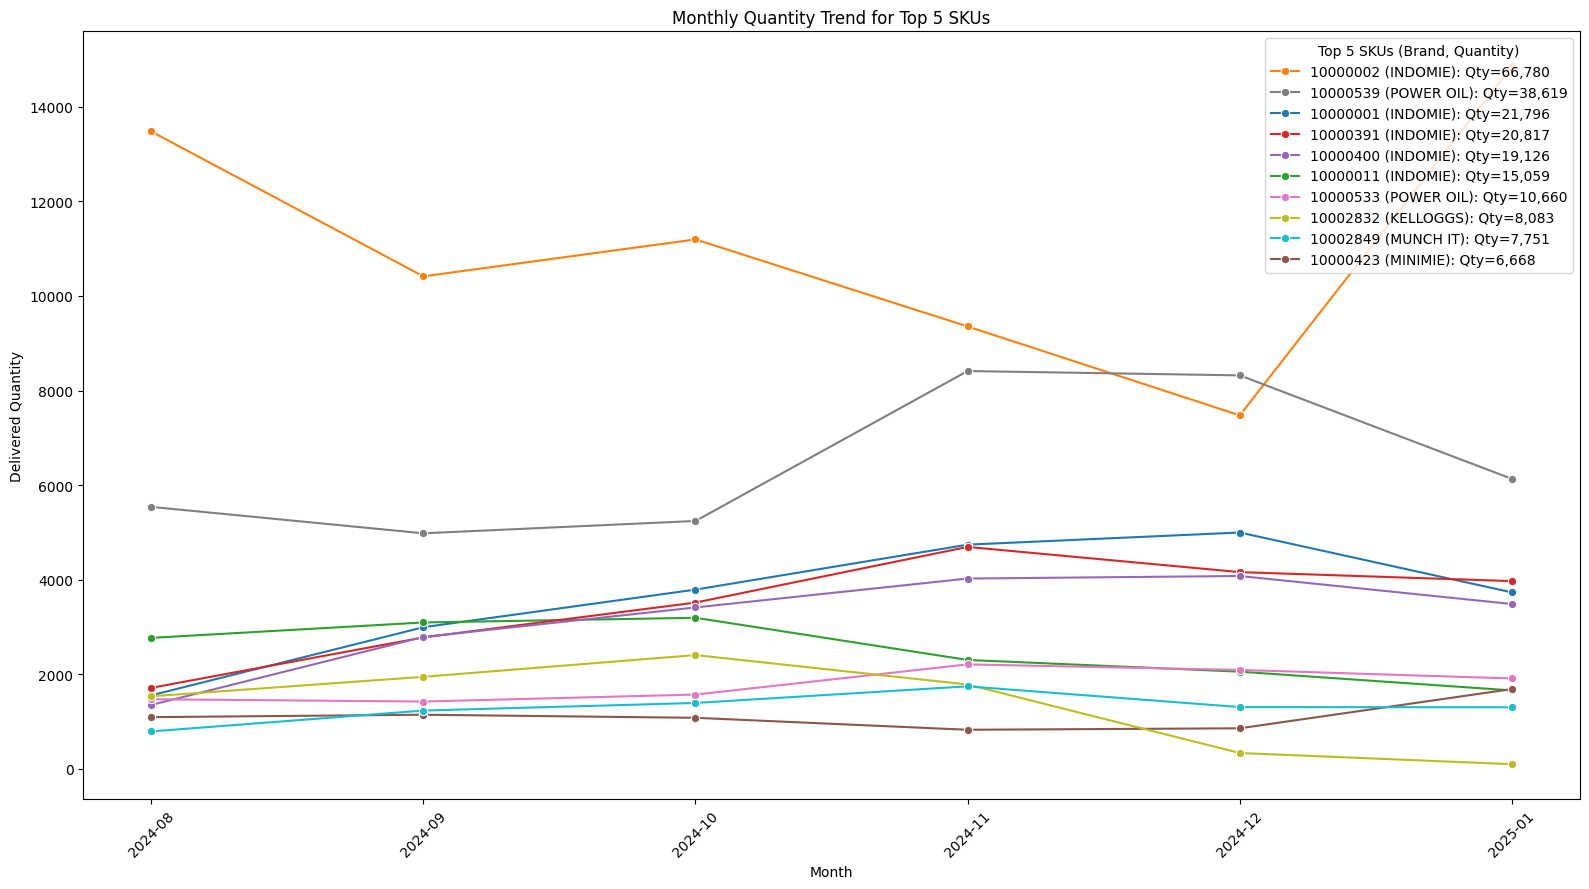

In [16]:
# Add 'Month' column
df['Month'] = df['Delivered_date'].dt.to_period('M').astype(str)

# Get top 5 SKUs by total quantity
top_skus_qty = df.groupby("SKU_Code")["Delivered Qty"].sum().sort_values(ascending=False).head(10)
top5_skus = top_skus_qty.index

# Create a dictionary to store SKU info with brand and total quantity, sorted by quantity
sku_info = {}
for sku, total_qty in top_skus_qty.items():
    brand = df[df["SKU_Code"] == sku]["Brand"].iloc[0]
    sku_info[sku] = f"{sku} ({brand}): Qty={int(total_qty):,}"

# Filter dataset
df_top_skus = df[df['SKU_Code'].isin(top5_skus)].copy()

# Create the SKU_ID for the legend using the dictionary
df_top_skus['SKU_ID'] = df_top_skus['SKU_Code'].map(sku_info)

# Group by SKU and Month
sku_monthly = df_top_skus.groupby(['Month', 'SKU_ID'])['Delivered Qty'].sum().reset_index()

plt.figure(figsize=(16, 9))  # Increased figure size for legend
ax = sns.lineplot(data=sku_monthly, x="Month", y="Delivered Qty", hue="SKU_ID", marker="o", palette="tab10")
plt.title("Monthly Quantity Trend for Top 5 SKUs")
plt.xlabel("Month")
plt.ylabel("Delivered Quantity")
plt.xticks(rotation=45)

# Sort the legend handles and labels based on the order in top_skus_qty
handles, labels = ax.get_legend_handles_labels()
sorted_labels = [sku_info[sku] for sku in top5_skus] # Use the ordered SKUs from top_skus_qty
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]
ax.legend(sorted_handles, sorted_labels, title='Top 5 SKUs (Brand, Quantity)', loc='upper right') #Added location

plt.tight_layout()
plt.show()


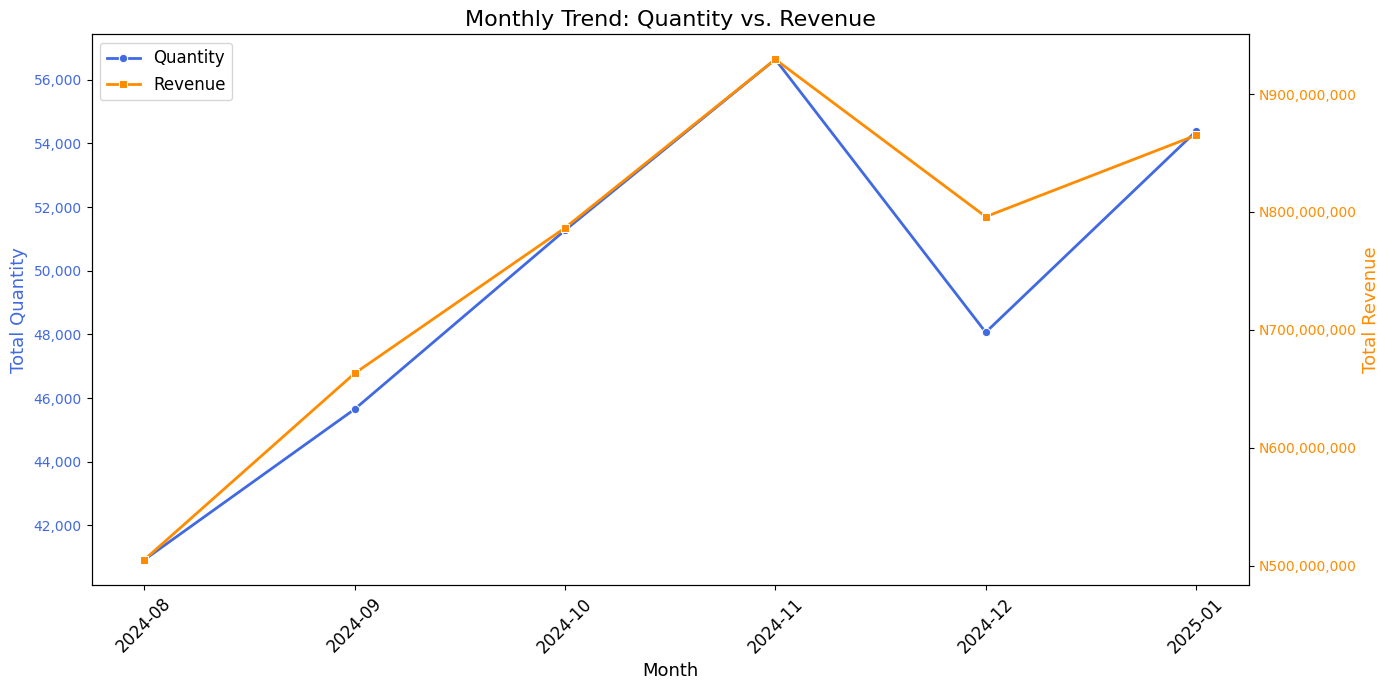

In [20]:
monthly_summary = df.groupby("Month")[["Delivered Qty", "Redistribution Value"]].sum().reset_index()

# Plot both trends
fig, ax1 = plt.subplots(figsize=(14, 7)) # Slightly increased height

color_qty = "royalblue"
color_revenue = "darkorange"

sns.lineplot(data=monthly_summary, x="Month", y="Delivered Qty", marker="o", label="Quantity", ax=ax1, color=color_qty, linewidth=2)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_summary, x="Month", y="Redistribution Value", marker="s", label="Revenue", ax=ax2, color=color_revenue, linewidth=2)

ax1.set_title("Monthly Trend: Quantity vs. Revenue", fontsize=16)
ax1.set_xlabel("Month", fontsize=13)
ax1.set_ylabel("Total Quantity", color=color_qty, fontsize=13)
ax2.set_ylabel("Total Revenue", color=color_revenue, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color_qty)
ax2.tick_params(axis='y', labelcolor=color_revenue)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Format Quantity
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'N{int(x):,}')) # Format Revenue with 'N'

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# Remove redundant legend on the second axis
ax2.get_legend().remove()

plt.tight_layout()
plt.show()

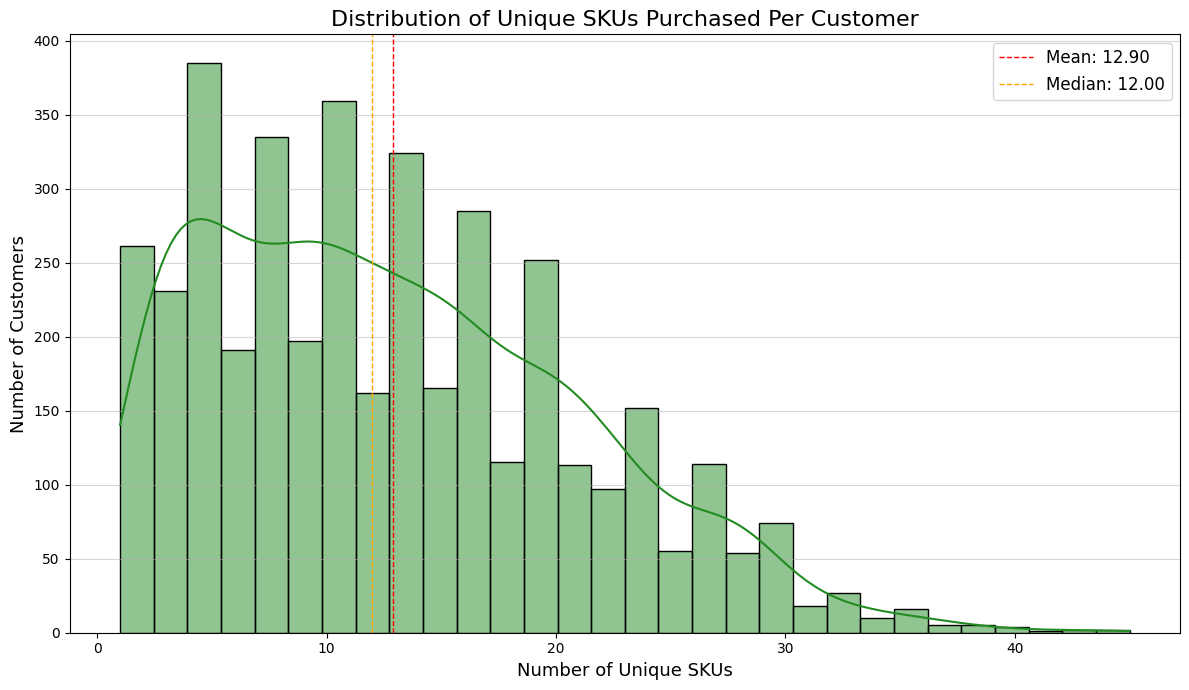

Mean Unique SKUs per Customer: 12.90
Median Unique SKUs per Customer: 12.00
Standard Deviation: 8.09
Minimum: 1
Maximum: 45
Quantiles:
0.25     6.0
0.50    12.0
0.75    18.0
Name: SKU_Code, dtype: float64


In [22]:
sku_per_customer = df.groupby("Customer_Phone")["SKU_Code"].nunique()
mean_skus = sku_per_customer.mean() # Calculate descriptive statistics
median_skus = sku_per_customer.median()

# Plot distribution
plt.figure(figsize=(12, 7))  # Slightly wider figure
sns.histplot(sku_per_customer, bins=30, kde=True, color="forestgreen") # More bins for finer detail
plt.title("Distribution of Unique SKUs Purchased Per Customer", fontsize=16)
plt.xlabel("Number of Unique SKUs", fontsize=13)
plt.ylabel("Number of Customers", fontsize=13)
plt.axvline(mean_skus, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_skus:.2f}')
plt.axvline(median_skus, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median_skus:.2f}')
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.5) # Add a subtle y-axis grid
plt.tight_layout()
plt.show()

print(f"Mean Unique SKUs per Customer: {mean_skus:.2f}")
print(f"Median Unique SKUs per Customer: {median_skus:.2f}")
print(f"Standard Deviation: {sku_per_customer.std():.2f}")
print(f"Minimum: {sku_per_customer.min()}")
print(f"Maximum: {sku_per_customer.max()}")
print(f"Quantiles:\n{sku_per_customer.quantile([0.25, 0.50, 0.75])}")
